In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Project 1 - Sales Data Analysis\Dataset MeriSKILL\Sales Data.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [5]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
185945    False
185946    False
185947    False
185948    False
185949    False
Length: 185950, dtype: bool

In [7]:
df.shape

(185950, 11)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [9]:
df.dtypes

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

In [10]:
list(df)

['Unnamed: 0',
 'Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address',
 'Month',
 'Sales',
 'City',
 'Hour']

In [11]:
df = df.drop(columns = ['Unnamed: 0'])

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [13]:
df.shape

(185950, 10)

In [14]:
df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()

Order Date
2019-01    1813586.44
2019-02    2202022.42
2019-03    2807100.38
2019-04    3390670.24
2019-05    3152606.75
2019-06    2577802.26
2019-07    2647775.76
2019-08    2244467.88
2019-09    2097560.13
2019-10    3736726.88
2019-11    3199603.20
2019-12    4613443.34
2020-01       8670.29
Freq: M, Name: Sales, dtype: float64

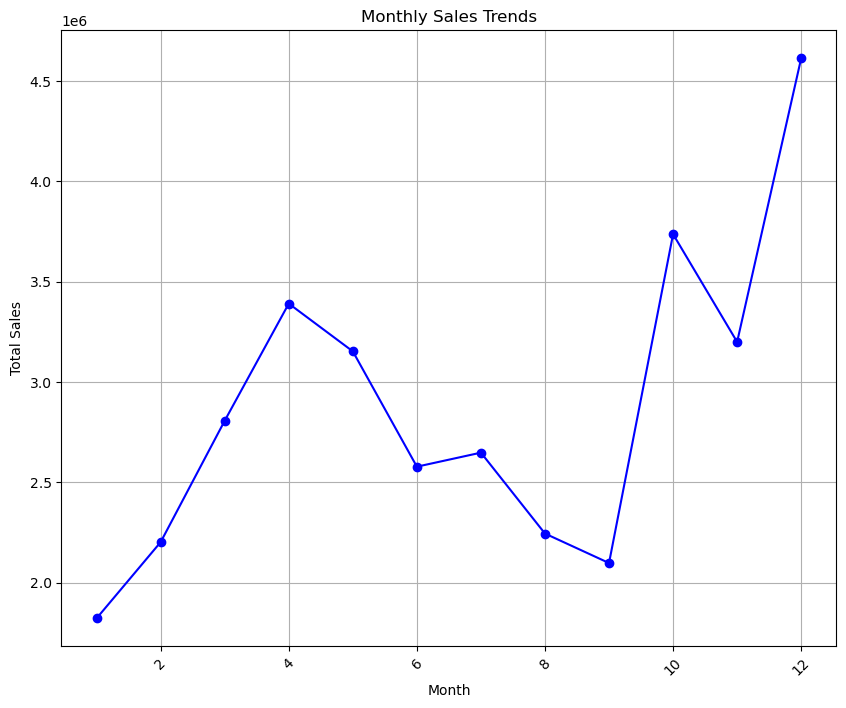

In [15]:
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot the sales trend over time
plt.figure(figsize=(10, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()


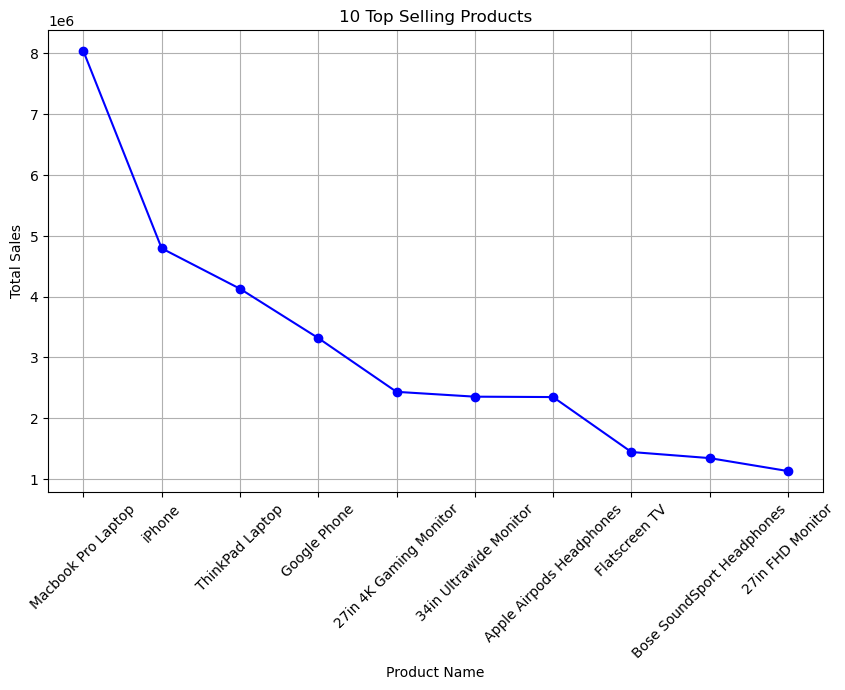

In [16]:
# Task 2: Identify the top-selling products by grouping and aggregating data
# Group data by 'Product' and calculate total sales for each product
top_selling_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

top_selling_products = top_selling_products.head(10)

plt.figure(figsize=(10, 6))
plt.plot(top_selling_products.index, top_selling_products.values, marker='o', linestyle='-', color='b')
plt.title('10 Top Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()



In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


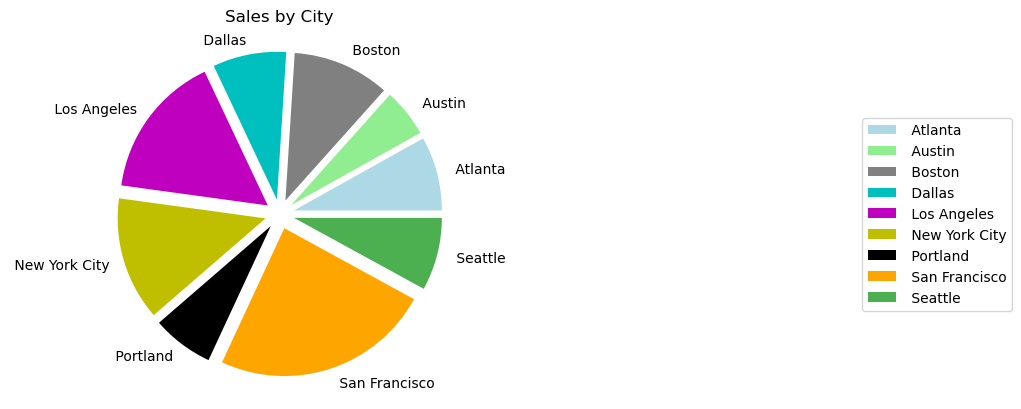

In [18]:
city_sales = df.groupby('City')['Sales'].sum()

myColors = ['lightblue', 'lightgreen', 'grey', 'c', 'm', 'y', 'k', 'orange', '#4CAF50']
explode = [.1,.1,.1,.1,.1,.1,.1,.1,.1]
plt.pie(city_sales.values, labels=city_sales.index, colors=myColors, explode = explode)
plt.title('Sales by City')
plt.legend(loc='center right', bbox_to_anchor =(2, 0, 0.5, 1))
plt.show()

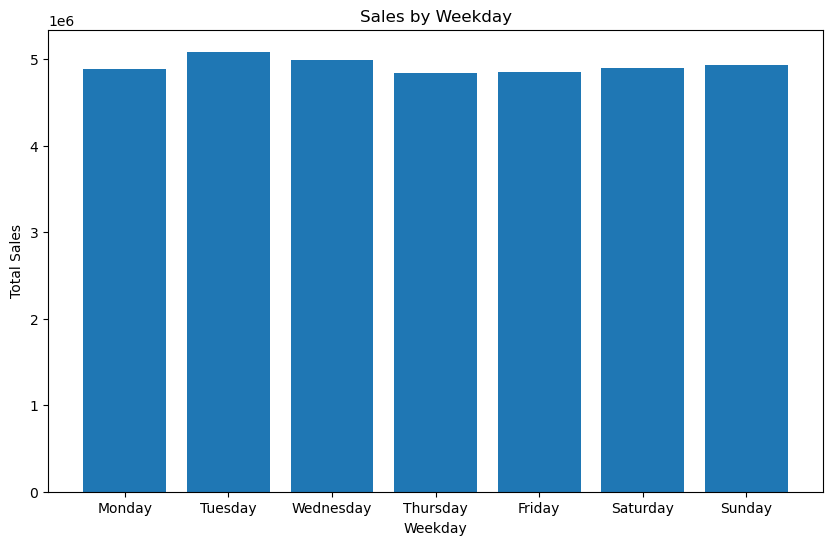

In [19]:
df['Date'] = pd.to_datetime(df['Order Date'])

# Extract the weekday from the 'Date' column (0 = Monday, 6 = Sunday)
df['Weekday'] = df['Date'].dt.weekday

# Calculate the total sales for each weekday
weekday_sales = df.groupby('Weekday')['Sales'].sum()

# Define the names for weekdays
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the days to start with Monday
weekday_sales = weekday_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot the sales for each weekday
plt.figure(figsize=(10, 6))
plt.bar(weekday_names, weekday_sales)
plt.title('Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()

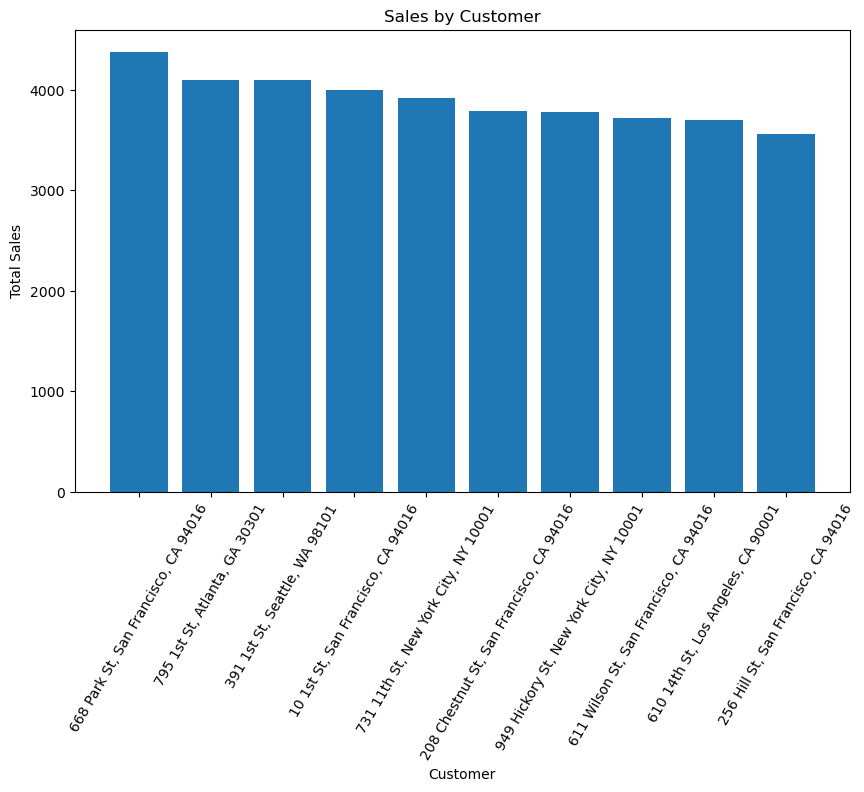

In [22]:
sales_by_customer = df.groupby('Purchase Address')['Sales'].sum().sort_values(ascending=False)

sales_by_customer = sales_by_customer.head(10)
plt.figure(figsize=(10, 6))
plt.bar(sales_by_customer.index, sales_by_customer.values)
plt.title('Sales by Customer')
plt.xlabel('Customer')
plt.xticks(rotation=60)
plt.ylabel('Total Sales')
plt.show()